# 1. Tensors

In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [5]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.5537, 0.9568],
        [0.4865, 0.9705]])

In [6]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
tensor.to("cuda")
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [8]:
# Check if cuda is available
torch.cuda.is_available()

True

In [9]:
tensor.numel()

12

In [15]:
tensor

tensor([[0.9934, 0.9555, 0.8940, 0.7703],
        [0.3984, 0.2245, 0.1665, 0.9386],
        [0.6826, 0.1847, 0.1717, 0.3266]])

In [17]:
tensor[:, 0]

tensor([0.9934, 0.3984, 0.6826])

In [19]:
torch.cat([tensor, tensor], dim=0)

tensor([[0.9934, 0.9555, 0.8940, 0.7703],
        [0.3984, 0.2245, 0.1665, 0.9386],
        [0.6826, 0.1847, 0.1717, 0.3266],
        [0.9934, 0.9555, 0.8940, 0.7703],
        [0.3984, 0.2245, 0.1665, 0.9386],
        [0.6826, 0.1847, 0.1717, 0.3266]])

In [22]:
t1 = torch.rand(3, 4)
t2 = torch.rand(6, 4)
t1 @ t2.T

tensor([[1.0158, 1.1182, 0.5133, 1.1559, 1.0655, 0.5654],
        [1.3703, 1.5606, 0.6686, 1.5874, 1.4355, 0.7972],
        [1.5236, 1.5691, 0.7005, 1.7359, 1.1291, 1.0993]])

In [25]:
agg = tensor.sum()
print(agg)
print(agg.item())

tensor(6.7069)
6.706882953643799


In [26]:
t2

tensor([[0.7770, 0.5560, 0.5553, 0.4493],
        [0.8870, 0.0291, 0.5043, 0.9116],
        [0.0853, 0.2563, 0.2940, 0.5286],
        [0.8842, 0.3014, 0.5210, 0.8566],
        [0.6043, 0.3901, 0.8540, 0.2847],
        [0.5434, 0.0171, 0.0328, 0.7617]])

In [29]:
t2.t_() # _ inplace suffix
t2

tensor([[0.7770, 0.8870, 0.0853, 0.8842, 0.6043, 0.5434],
        [0.5560, 0.0291, 0.2563, 0.3014, 0.3901, 0.0171],
        [0.5553, 0.5043, 0.2940, 0.5210, 0.8540, 0.0328],
        [0.4493, 0.9116, 0.5286, 0.8566, 0.2847, 0.7617]])

In [30]:
t1

tensor([[0.4183, 0.1802, 0.7333, 0.4082],
        [0.6412, 0.1553, 0.9750, 0.5436],
        [0.9195, 0.7727, 0.0627, 0.7672]])

In [37]:
t2 = t1

In [38]:
t1.add_(1)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [39]:
t2

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

# 2. Datasets and DataLoaders

In [40]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:10<00:00, 16935801.96it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [41]:
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

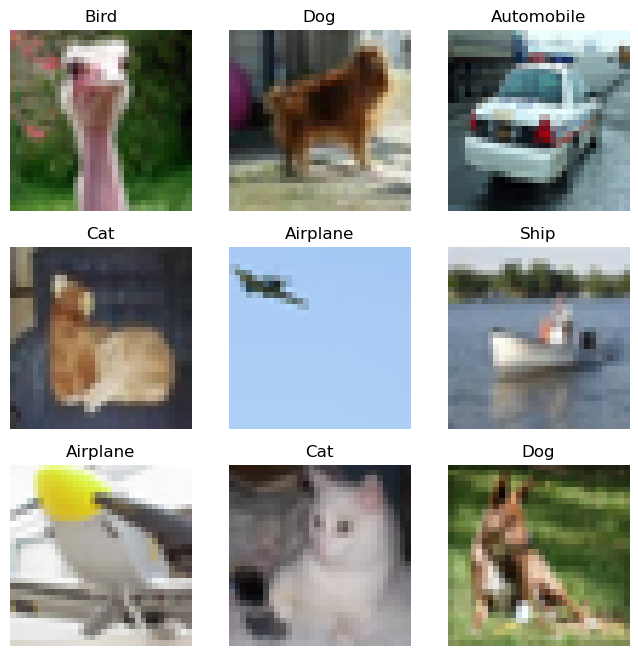

In [53]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    img = img.numpy().transpose((1, 2, 0))
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())

In [57]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

Feature batch shape: torch.Size([32, 3, 32, 32])
Labels batch shape: torch.Size([32])


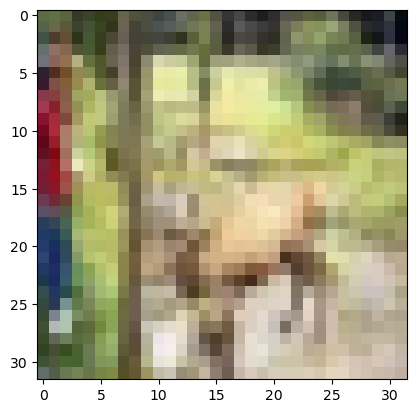

In [68]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].numpy().transpose((1, 2, 0))
label = train_labels[0]
plt.imshow(img)
plt.show()

In [62]:
train_features[0].shape

torch.Size([3, 32, 32])

In [63]:
train_features[0].squeeze().shape

torch.Size([3, 32, 32])

# 3. Transforms

In [69]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

100%|██████████| 26421880/26421880 [00:00<00:00, 49567352.05it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 990430.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 17410311.51it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 40586986.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [71]:
ds[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

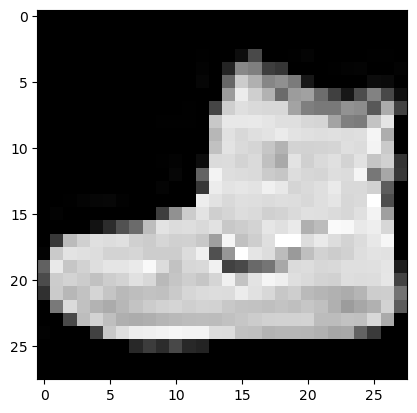

In [76]:
img, label = ds[0]
plt.imshow(img.squeeze(), cmap="gray")

# 4. Build a Neural Network

In [77]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [78]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [79]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [80]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [81]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y_pred

tensor([6], device='cuda:0')

In [82]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [83]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [85]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [86]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 1.6839e-02, -5.3007e-03,  4.2661e-03,  ...,  7.5637e-03,
         -2.6786e-02,  4.5974e-03],
        [-3.1629e-02, -2.1648e-02, -5.3608e-03,  ...,  1.4105e-05,
          1.6112e-02,  2.1060e-02]], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0203, 0.0216], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0349,  0.0200,  0.0012,  ...,  0.0309,  0.0338, -0.0197],
        [ 0.0058,  0.0353, -0.003

# 5. AutoGrad

In [87]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [88]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0408, 0.1497, 0.3314],
        [0.0408, 0.1497, 0.3314],
        [0.0408, 0.1497, 0.3314],
        [0.0408, 0.1497, 0.3314],
        [0.0408, 0.1497, 0.3314]])
tensor([0.0408, 0.1497, 0.3314])


# 6. Optimizing Model Parameters

In [89]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [90]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [91]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [92]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [93]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [94]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306607 [    0/60000]
loss: 2.295382 [ 6400/60000]
loss: 2.272991 [12800/60000]
loss: 2.268456 [19200/60000]
loss: 2.245963 [25600/60000]
loss: 2.227669 [32000/60000]
loss: 2.232512 [38400/60000]
loss: 2.205746 [44800/60000]
loss: 2.202101 [51200/60000]
loss: 2.167195 [57600/60000]
Test Error: 
 Accuracy: 46.5%, Avg loss: 2.164249 

Epoch 2
-------------------------------
loss: 2.174173 [    0/60000]
loss: 2.168847 [ 6400/60000]
loss: 2.104299 [12800/60000]
loss: 2.121875 [19200/60000]
loss: 2.073930 [25600/60000]
loss: 2.023278 [32000/60000]
loss: 2.051121 [38400/60000]
loss: 1.977032 [44800/60000]
loss: 1.981914 [51200/60000]
loss: 1.918195 [57600/60000]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.908606 

Epoch 3
-------------------------------
loss: 1.938038 [    0/60000]
loss: 1.920182 [ 6400/60000]
loss: 1.785025 [12800/60000]
loss: 1.832596 [19200/60000]
loss: 1.733150 [25600/60000]
loss: 1.680750 [32000/60000]
loss: 1.709895 [38400/

KeyboardInterrupt: 